### Задание 7

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from math import sqrt, copysign, sin, cos, exp, acos, asin
from typing import Tuple

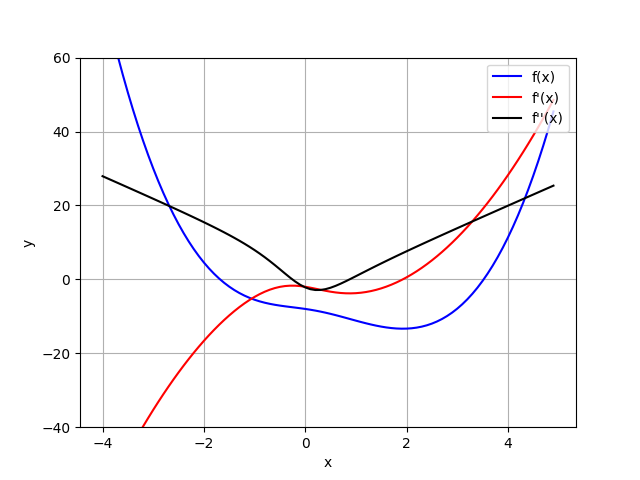

In [2]:
plt.close()

EPSILON = 0.0001

def fun(x: float) -> float:
    return x**2 * sqrt(x**2 + 2) - (2 * x + 5) * sqrt(x**2 + 1) - 3

def d_fun(x: float) -> float:
    return (2 * x * sqrt(x**2 + 2) + x**3/sqrt(x**2 + 2)
            - 2 * sqrt(x**2 + 1) - x * (2 * x + 5) / sqrt(x**2 + 1))

def d2_fun(x: float) -> float:
    return (2 * sqrt(x**2 + 2)
            + 5 * x**2 / sqrt(x**2 + 2)
            - x**4 / (x**2 + 2)**1.5
            - (6 * x + 5) / sqrt(x**2 + 1)
            + x * (2 * x**2 + 5 * x) / (x**2 + 1)**1.5)


x_val = [x/10.0 for x in range(-40, 50)]
y_val = [fun(x) for x in x_val]

plt.plot(x_val, y_val, label = "f(x)", c='b')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")


x_val = [x/10.0 for x in range(-40, 50)]
y_val = [d_fun(x) for x in x_val]
plt.plot(x_val, y_val, label = 'f\'(x)', c='r')

x_val = [x/10.0 for x in range(-40, 50)]
y_val = [d2_fun(x) for x in x_val]

plt.plot(x_val, y_val, label = "f''(x)", c='black')
plt.ylim(-40, 60)
plt.legend(loc = 'upper right')
plt.show()

***Метод простой итерации***

In [3]:
def phi(x: float, _lambda: float) -> float:
    return x + _lambda * fun(x)


def sufficient_condition_d_phi(a: float, b: float, _lambda: float, d_fun=d_fun) -> bool:
    # |1 + λ * fun(x)'| < 1 on [a, b]: (f(a) * f(b) < 0)
    num_points = 100
    step = (b - a) / (num_points - 1)
    x = a
    for i in range(num_points - 1):
        if not abs(1 + _lambda * d_fun(x)) < 1:
            return False
        x += step
    if not abs(1 + _lambda * d_fun(b)) < 1:
        return False
    return True

def simple_iteration(
        a: float, b: float,_lambda: float, eps: float = EPSILON,
        phi=phi, fin=fun, d_fun=d_fun
    ) -> Tuple[float, int]:
    if a > b:
        a, b = b, a

    if not sufficient_condition_d_phi(a, b, _lambda, d_fun):
        raise ValueError("Method doesn't converge")

    previous = a
    x_i = phi(previous, _lambda)
    MAX_ITERATION = 1000
    curr_iteration = 0
    while (abs(x_i - previous) > eps and curr_iteration < MAX_ITERATION):
        previous = x_i
        x_i = phi(previous, _lambda)
        curr_iteration += 1
    
    return (x_i, curr_iteration)

print("Simple Iteration Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := simple_iteration(-2, 0, 1/20))[0]:<15.8f} {r1[1]:<10}")
print(f"{'2':<6} {(r2 := simple_iteration(3, 4, -1/30))[0]:<15.8f} {r2[1]:<10}")

Simple Iteration Method Results:
Root   Value           Iterations
1      -1.68074576     8         
2      3.52282738      9         


***Метод Ньютона***

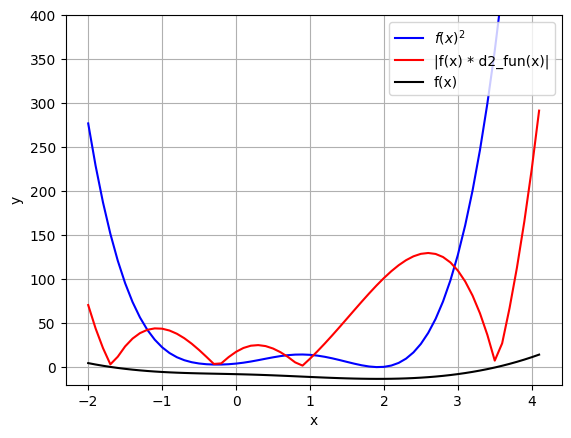

In [4]:
%matplotlib inline
plt.close()

x_val = [x/10.0 for x in range(-20, 42)]
y_val = [d_fun(x) ** 2 for x in x_val]
plt.plot(x_val, y_val, label = r'$f(x)^{2}$', c='b')

x_val = [x/10.0 for x in range(-20, 42)]
y_val = [abs(d2_fun(x) * fun(x)) for x in x_val]
plt.plot(x_val, y_val, label = "|f(x) * d2_fun(x)|", c='r')

x_val = [x/10.0 for x in range(-20, 42)]
y_val = [fun(x) for x in x_val]
plt.plot(x_val, y_val, label = 'f(x)', c='black')

plt.grid()
plt.ylim(-20, 400)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'upper right')
plt.show()

In [5]:
def sufficient_condition_newton(a: float, b: float, fun=fun, d_fun=d_fun, d2_fun=d2_fun):
    # |f(x) * f''(x)| < f'(x) ^ 2 on [a, b], f'(x) > 0
    num_points = 100
    step = (b - a) / (num_points - 1)
    x = a
    for i in range(num_points - 1):
        if not abs(fun(x) * d2_fun(x)) < d_fun(x) ** 2:
            return False
        x += step
    if not abs(fun(x) * d2_fun(x)) < d_fun(x) ** 2:
        return False
    return True

# x_start = f(a) * f''(a) > 0 ? a : f(b) * f''(b) > b : b : exception
def newton_method(
        a: float, b: float, eps: float = EPSILON,
        fun=fun, d_fun=d_fun, d2_fun=d2_fun
    ) -> Tuple[float, int]:
    if a > b:
        a, b = b, a

    if not sufficient_condition_newton(a, b, fun, d_fun, d2_fun):
        raise ValueError("Method doesn't converge")

    x_i = 0.1
    previous = 0.1
    if copysign(1, fun(a)) * copysign(1, d2_fun(a)) > 0:
        previous = a
        x_i = a - fun(a) / d_fun(a)
    elif copysign(1, fun(b)) * copysign(1, d2_fun(b)) > 0:
        previous = b
        x_i = b - fun(b) / d_fun(b)

    MAX_ITERATION = 1000
    curr_iteration = 0
    while (abs(x_i - previous) > eps and curr_iteration < MAX_ITERATION):
        previous = x_i
        x_i = previous - fun(previous) / d_fun(previous)
        curr_iteration += 1
    return x_i, curr_iteration

print("Newton's Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := newton_method(-2, -1.3))[0]:<15.8f} {r1[1]:<10}")
print(f"{'2':<6} {(r2 := newton_method(3, 4))[0]:<15.8f} {r2[1]:<10}")

Newton's Method Results:
Root   Value           Iterations
1      -1.68069559     3         
2      3.52285914      3         


***Метод секущих***

In [6]:
def sufficient_condition_secant(a: float, b: float, fun=fun, d_fun=d_fun, d2_fun=d2_fun):
    # |f(x) * f''(x)| < f'(x) ^ 2 on [a, b], f'(x) > 0
    num_points = 100
    step = (b - a) / (num_points - 1)
    x = a
    for i in range(num_points - 1):
        if not abs(fun(x) * d2_fun(x)) < d_fun(x) ** 2:
            return False
        x += step
    if not abs(fun(x) * d2_fun(x)) < d_fun(x) ** 2:
        return False
    return True

def secant_method(
        a:float, b: float, eps: float = EPSILON, fun=fun, d_fun=d_fun, d2_fun=d2_fun
    ) -> Tuple[float, int]:

    if a > b:
        a, b = b, a

    if not sufficient_condition_secant(a, b, fun, d_fun, d2_fun):
        raise ValueError("Method doesn't converge")
    x_i = 0.1
    previous = 0.1
    if copysign(1, fun(a)) * copysign(1, d2_fun(a)) > 0:
        previous = a
        x_i = a - fun(a) * (b - a) / (fun(b) - fun(a))
    elif copysign(1, fun(b)) * copysign(1, d2_fun(b)) > 0:
        previous = b
        x_i = b - fun(b) * (b - a) / (fun(b) - fun(a))

    MAX_ITERATION = 1000
    curr_iteration = 0
    while (abs(x_i - previous) > eps and curr_iteration < MAX_ITERATION):
        tmp = x_i
        x_i = x_i - fun(x_i) * (x_i - previous) / (fun(x_i) - fun(previous))
        previous = tmp
        curr_iteration += 1
    return x_i, curr_iteration

print("Secant Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := secant_method(-2, -1.3))[0]:<15.8f} {r1[1]:<10}")
print(f"{'2':<6} {(r2 := secant_method(3, 4))[0]:<15.8f} {r2[1]:<10}")

Secant Method Results:
Root   Value           Iterations
1      -1.68069558     4         
2      3.52285914      4         


***Метод хорд***

In [7]:
def sufficient_chord_method(a: float, b: float, fun=fun, d_fun=d_fun, d2_fun=d2_fun):
    # |f(x) * f''(x)| < f'(x) ^ 2 on [a, b], f'(x) > 0
    num_points = 100
    step = (b - a) / (num_points - 1)
    x = a
    for i in range(num_points - 1):
        if not abs(fun(x) * d2_fun(x)) < d_fun(x) ** 2:
            return False
        x += step
    if not abs(fun(x) * d2_fun(x)) < d_fun(x) ** 2:
        return False
    return True

def chord_method(
        a:float, b: float, eps: float = EPSILON, fun=fun, d_fun=d_fun, d2_fun=d2_fun
    ) -> Tuple[float, int]:

    if a > b:
        a, b = b, a

    if not sufficient_condition_secant(a, b, fun, d_fun, d2_fun):
        raise ValueError("Method doesn't converge")
    x_i = 0.1
    previous = 0.1
    z = 0.1
    if copysign(1, fun(a)) * copysign(1, d2_fun(a)) > 0:
        z = a
        previous = a
        x_i = a - fun(a) * (b - a) / (fun(b) - fun(a))
    elif copysign(1, fun(b)) * copysign(1, d2_fun(b)) > 0:
        z = b
        previous = b
        x_i = b - fun(b) * (b - a) / (fun(b) - fun(a))

    MAX_ITERATION = 1000
    curr_iteration = 0
    while (abs(x_i - previous) > eps and curr_iteration < MAX_ITERATION):
        tmp = x_i
        x_i = x_i - fun(x_i) * (z - x_i) / (fun(z) - fun(x_i))
        previous = tmp
        curr_iteration += 1
    return x_i, curr_iteration

print("Chord Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := chord_method(-2, -1.3))[0]:<15.8f} {r1[1]:<10}")
print(f"{'2':<6} {(r2 := chord_method(3, 4))[0]:<15.8f} {r2[1]:<10}")

Chord Method Results:
Root   Value           Iterations
1      -1.68068902     5         
2      3.52285506      6         


***Метод дихотомии***

In [8]:
def check_boundaries(a: float, b: float, fun=fun) -> bool:
    if fun(a) * fun(b) < 0:
        return True
    return False

def dichotomy_method(a: float, b: float, eps: float = EPSILON, fun=fun) -> Tuple[float, int]:
    if a > b:
        a, b = b, a

    if not check_boundaries(a, b, fun):
        raise ValueError("Method doesn't converge")
    MAX_ITERATION = 1000
    curr_iteration = 0
    while (abs(a - b) > eps) and curr_iteration < MAX_ITERATION:
        tmp = fun((b - a) / 2 + a)
        if copysign(1, tmp) * copysign(1, fun(b)) < 0:
            a = (b - a) / 2 + a
        elif copysign(1, tmp) * copysign(1, fun(a)) < 0:
            b = (b - a) / 2 + a
        else:
            raise ValueError("Method doesn't converge")
        curr_iteration += 1
    return a, curr_iteration

print("Dichotomy Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := dichotomy_method(-2, -1.3))[0]:<15.8f} {r1[1]:<10}")
print(f"{'2':<6} {(r2 := dichotomy_method(3, 4))[0]:<15.8f} {r2[1]:<10}")

Dichotomy Method Results:
Root   Value           Iterations
1      -1.68076172     13        
2      3.52282715      14        


### Задание 8

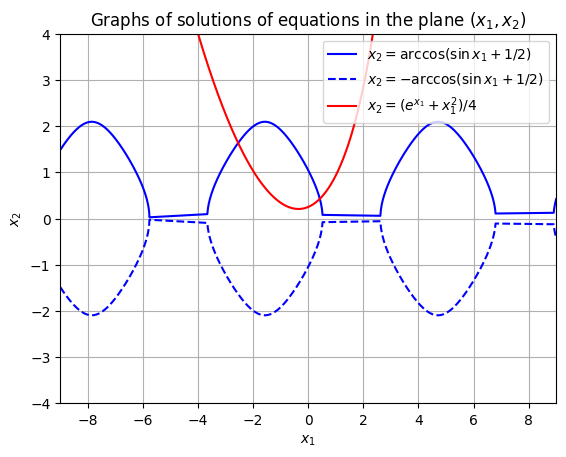

In [9]:
%matplotlib inline
def fun1(x: Tuple[float, float]) -> float:
    """2*sin(x1) - 2*cos(x2) = -1"""
    x1, x2 = x[0], x[1]
    return 2 * sin(x1) - 2 * cos(x2) + 1

def fun2(x: Tuple[float, float]) -> float:
    """4*x2 - exp(x1) - x1^2 = 0"""
    x1, x2 = x[0], x[1]
    return 4 * x2 - exp(x1) - x1**2

def det_ne(x: Tuple[float, float]) -> float:
    x1 = x[0]
    x2 = x[1]
    return 2 * cos(x1) * 4 - 2 * sin(x2) * (-exp(x1) - 2 * x1)

x1_min, x1_max = -9, 9
step = 0.01
x1_vals = []
x1 = x1_min
while x1 <= x1_max:
    x1_vals.append(x1)
    x1 += step

x2_from_eq1_pos = []
x2_from_eq1_neg = []
x1_valid_eq1 = []

x2_from_eq2 = []
x1_valid_eq2 = []

for x1 in x1_vals:
    x2_eq2 = (exp(x1) + x1**2) / 4.0
    x1_valid_eq2.append(x1)
    x2_from_eq2.append(x2_eq2)

    arg = sin(x1) + 0.5
    if -1 <= arg <= 1:
        try:
            val = acos(arg)
            x1_valid_eq1.append(x1)
            x2_from_eq1_pos.append(val)
            x2_from_eq1_neg.append(-val)
        except ValueError:
            pass

plt.plot(x1_valid_eq1, x2_from_eq1_pos, 'b', label=r'$x_2 = \arccos(\sin x_1 + 1/2)$')
plt.plot(x1_valid_eq1, x2_from_eq1_neg, 'b--', label=r'$x_2 = -\arccos(\sin x_1 + 1/2)$')

plt.plot(x1_valid_eq2, x2_from_eq2, 'r', label=r'$x_2 = (e^{x_1} + x_1^2)/4$')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Graphs of solutions of equations in the plane $(x_1, x_2)$')
plt.legend(loc = 'upper right')
plt.grid()
plt.ylim(-4, 4)
plt.xlim(x1_min, x1_max)
plt.show()

***Метод Ньютона***

In [10]:
def newton_method_nes(
        a: Tuple[float, float], b: Tuple[float, float], eps: float = EPSILON,
        fun = [fun1, fun2], det= det_ne) -> Tuple[float, float, int]:
    MAX_ITERATION = 1000
    xi = list(a)
    for i in range(MAX_ITERATION):
        f1 = fun[0](xi)
        f2 = fun[1](xi)
        det_value = det(xi)
        if abs(det_value) < eps:
            raise ValueError("det == 0")
        dx1 = -(f1 * 4 - f2 * 2 * sin(xi[1])) / det_value
        dx2 = -(2 * cos(xi[0]) * f2 - (-exp(xi[0]) - 2 * xi[0]) * f1) / det_value
        xi[0] += dx1
        xi[1] += dx2
        if abs(dx1) < eps and abs(dx2) < eps:
            return (xi[0], xi[1], i + 1)
        if not (a[0] <= xi[0] <= b[0] or a[0] >= xi[0] >= b[0]) and not (
            a[1] <= xi[1] <= b[1] or a[1] >= xi[1] >= b[1]):
            raise ValueError("Method doesn't converge")
    return (xi[0], xi[1], MAX_ITERATION)


print("Newton's Method Results:")
print("=" * 60)
print(f"{'Root':<6} {'x₁':<15} {'x₂':<15} {'Iterations':<10}")
print("-" * 60)
print(f"{'1':<6} {(r1 := newton_method_nes((-3, 2), (-2, 1)))[0]:<15.8f} {r1[1]:<15.8f} {r1[2]:<10}")
print(f"{'2':<6} {(r2 := newton_method_nes((0, 0), (2, 1)))[0]:<15.8f} {r2[1]:<15.8f} {r2[2]:<10}")

Newton's Method Results:
Root   x₁              x₂              Iterations
------------------------------------------------------------
1      -2.54201383     1.63513552      4         
2      0.42297999      0.42635396      4         


***Метод простой итерации***

In [11]:
def phi_x1(x: Tuple[float, float], _lambda: float = 1.0) -> float:
    return x[0] - _lambda *  fun1(x)

def phi_x2(x: Tuple[float, float], _lambda: float = 1.0) -> float:
    return x[1] - _lambda *  fun2(x)

def sufficient_condition_simple_nes(
        a: float, b: float,
        _lambda1: float = 1.0, _lambda2: float = 1.0) -> bool:
    d = 20
    for i in range(d + 1):
        x1 = a[0] + (b[0] - a[0]) * i / d
        for j in range(d + 1):
            x2 = a[1] + (b[1] - a[1]) * j / d
            row1 = abs(1 - _lambda1 * 2 * cos(x1)) + abs(_lambda1 * 2 * sin(x2))
            row2 = abs(_lambda2 * (exp(x1) + 2 * x1)) + abs(1 - _lambda2 * 4)
            if max(row1, row2) >= 1:
                print(f"\nWarning: sufficient condition not satisfied.\nConvergence not guaranteed. |Ф'| = {max(row1, row2)} > 1")
                return False
    return True

def simple_iteration_nes(
        a: Tuple[float, float], b: Tuple[float, float], _lambda1: float = 1.0, _lambda2: float = 1.0,
        phi=[phi_x1, phi_x2], eps: float = EPSILON) -> Tuple[float, float, int]:
    
    sufficient_condition_simple_nes(a, b, _lambda1, _lambda2)
    x1, x2 = a
    x1_old, x2_old = x1, x2
    MAX_ITERATION = 10000
    for i in range(MAX_ITERATION):
        x1 = phi_x1((x1_old, x2_old), _lambda1)
        x2 = phi_x2((x1_old, x2_old), _lambda2)
        if abs(x1 - x1_old) < eps and abs(x2 - x2_old) < eps:
            return (x1, x2, i + 1)
        x1_old, x2_old = x1, x2
    return (x1, x2, MAX_ITERATION)

print("Simple Iteration Method Results:")
print("=" * 60)
print(f"{'Root':<6} {'x₁':<15} {'x₂':<15} {'Iterations':<10}")
print("-" * 60)
print(f"{'1':<6} {(r1 := simple_iteration_nes((-3, 2), (-2, 1), -0.17, 0.17))[0]:<15.8f} {r1[1]:<15.8f} {r1[2]:<10}")
print(f"{'2':<6} {(r2 := simple_iteration_nes((0, 0), (2, 1), 0.3, 0.3))[0]:<15.8f} {r2[1]:<15.8f} {r2[2]:<10}")

Simple Iteration Method Results:
Root   x₁              x₂              Iterations
------------------------------------------------------------

Convergence not guaranteed. |Ф'| = 1.3315361983774632 > 1
1      -2.54205095     1.63528400      26        

Convergence not guaranteed. |Ф'| = 1.1066356401171524 > 1
2      0.42297025      0.42632549      8         


***Метод Зейделя***

In [12]:
def phi_x1(x: Tuple[float, float], _lambda: float = 1.0) -> float:
    return x[0] - _lambda *  fun1(x)

def phi_x2(x: Tuple[float, float], _lambda: float = 1.0) -> float:
    return x[1] - _lambda *  fun2(x)

def sufficient_condition_simple_nes(
        a: float, b: float,
        _lambda1: float = 1.0, _lambda2: float = 1.0) -> bool:
    d = 20
    for i in range(d + 1):
        x1 = a[0] + (b[0] - a[0]) * i / d
        for j in range(d + 1):
            x2 = a[1] + (b[1] - a[1]) * j / d
            row1 = abs(1 - _lambda1 * 2 * cos(x1)) + abs(_lambda1 * 2 * sin(x2))
            row2 = abs(_lambda2 * (exp(x1) + 2 * x1)) + abs(1 - _lambda2 * 4)
            if max(row1, row2) >= 1:
                print(f"\nWarning: sufficient condition not satisfied.\nConvergence not guaranteed. |Ф'| = {max(row1, row2)} > 1")
                return False
    return True

def seidel_nes(
        a: Tuple[float, float], b: Tuple[float, float], _lambda1: float = 1.0, _lambda2: float = 1.0,
        phi=[phi_x1, phi_x2], eps: float = EPSILON) -> Tuple[float, float, int]:
    
    sufficient_condition_simple_nes(a, b, _lambda1, _lambda2)
    x1, x2 = a
    MAX_ITERATION = 10000
    for i in range(MAX_ITERATION):
        x1_old, x2_old = x1, x2
        x1 = phi_x1((x1, x2), _lambda1)
        x2 = phi_x2((x1, x2), _lambda2)
        if abs(x1 - x1_old) < eps and abs(x2 - x2_old) < eps:
            return (x1, x2, i + 1)
    return (x1, x2, MAX_ITERATION)

print("Seidel Method Results:")
print("=" * 60)
print(f"{'Root':<6} {'x₁':<15} {'x₂':<15} {'Iterations':<10}")
print("-" * 60)
print(f"{'1':<6} {(r1 := seidel_nes((-3, 2), (-2, 1), -0.5, 0.17))[0]:<15.8f} {r1[1]:<15.8f} {r1[2]:<10}")
print(f"{'2':<6} {(r2 := seidel_nes((0, 0), (2, 1), 0.5, 0.2))[0]:<15.8f} {r2[1]:<15.8f} {r2[2]:<10}")

Seidel Method Results:
Root   x₁              x₂              Iterations
------------------------------------------------------------

Convergence not guaranteed. |Ф'| = 1.3315361983774632 > 1
1      -2.54202984     1.63514342      8         

Convergence not guaranteed. |Ф'| = 1.016135369898218 > 1
2      0.42298194      0.42635160      6         
